<a href="https://colab.research.google.com/github/venkataramanik/Supplychain/blob/main/FBProspect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplu14m1z3/_ah810wa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplu14m1z3/_9exj3cl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47018', 'data', 'file=/tmp/tmplu14m1z3/_ah810wa.json', 'init=/tmp/tmplu14m1z3/_9exj3cl.json', 'output', 'file=/tmp/tmplu14m1z3/prophet_model4rlodnqn/prophet_model-20250714155345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:53:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:53:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


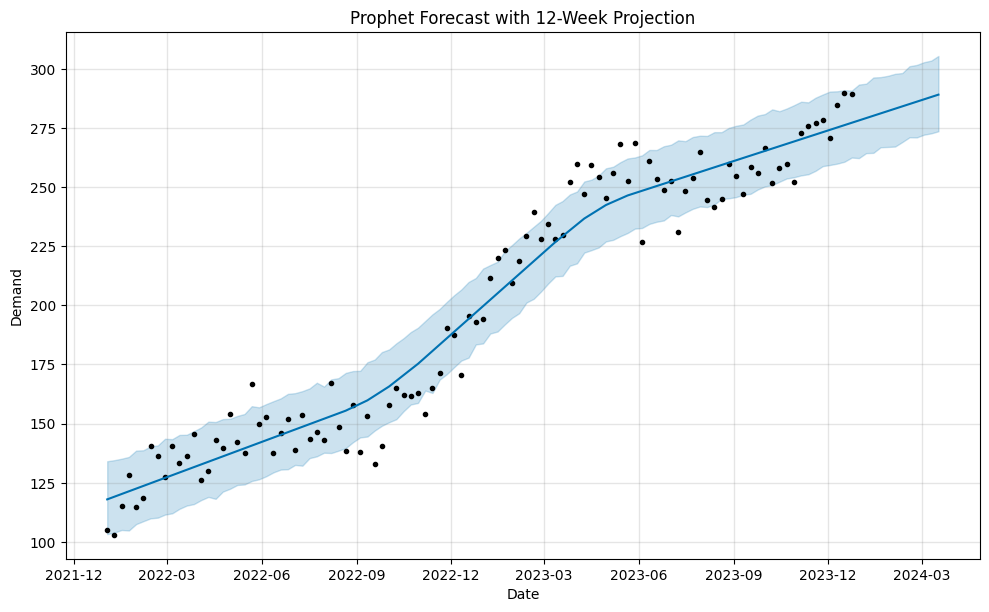

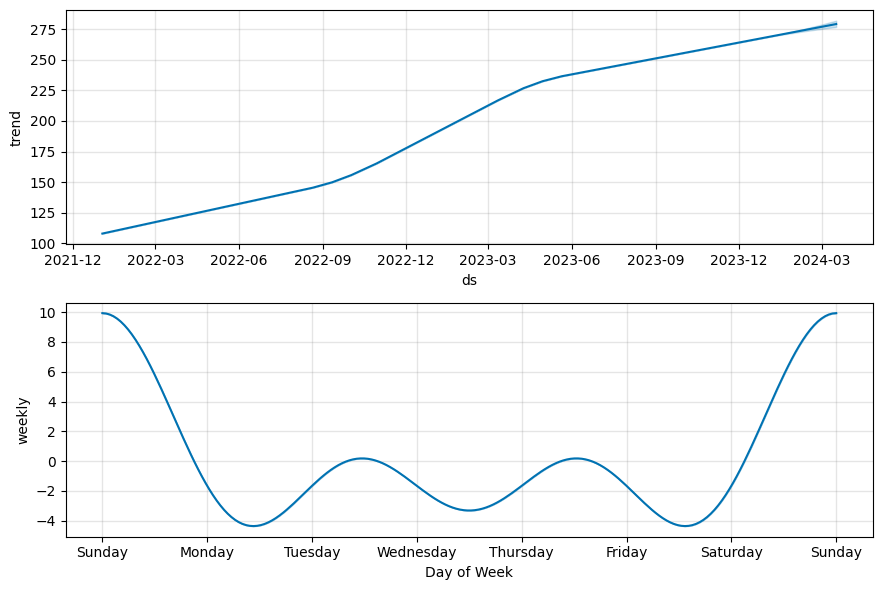

MAPE on historical data: 5.33%


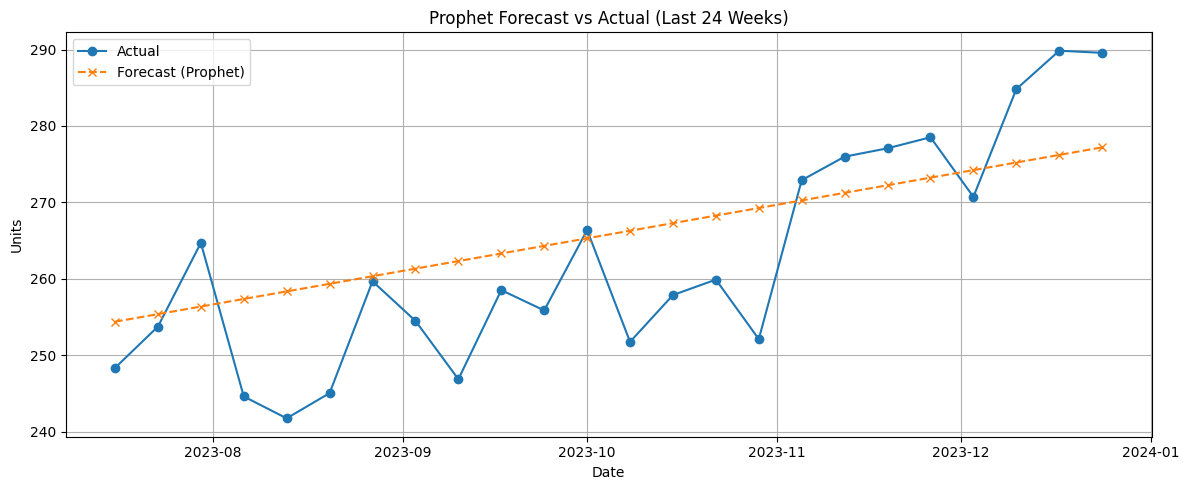

In [1]:
# Install Prophet if needed
!pip install prophet --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

# Simulate 2 years (104 weeks) of demand with trend + weekly seasonality + noise
np.random.seed(42)
weeks = pd.date_range(start='2022-01-01', periods=104, freq='W-SUN')
trend = np.linspace(100, 300, 104)  # linear upward trend
seasonality = 20 * np.sin(np.arange(104) * (2 * np.pi / 52))  # yearly-like seasonality
noise = np.random.normal(0, 10, 104)
demand = trend + seasonality + noise

df = pd.DataFrame({'ds': weeks, 'y': demand})

# Prophet model
model = Prophet(weekly_seasonality=True, yearly_seasonality=False)
model.fit(df)

# Forecast next 12 weeks
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("Prophet Forecast with 12-Week Projection")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.grid(True)
plt.show()

# Plot components (trend + seasonality)
fig2 = model.plot_components(forecast)
plt.show()

# --------------------------------------------
# 🧮 Forecast Accuracy (MAPE on training period)
# --------------------------------------------
# Merge actual and predicted
merged = df.merge(forecast[['ds', 'yhat']], on='ds')
mape = mean_absolute_percentage_error(merged['y'], merged['yhat'])
print(f"MAPE on historical data: {mape * 100:.2f}%")

# --------------------------------------------
# 📊 Zoomed Forecast vs Actual (last 24 weeks)
# --------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(merged['ds'][-24:], merged['y'][-24:], label='Actual', marker='o')
plt.plot(merged['ds'][-24:], merged['yhat'][-24:], label='Forecast (Prophet)', linestyle='--', marker='x')
plt.title("Prophet Forecast vs Actual (Last 24 Weeks)")
plt.xlabel("Date")
plt.ylabel("Units")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔮 Project 5 – Retail Demand Forecasting with Facebook Prophet

## 🧭 Objective

Forecast future weekly demand for a **seasonal retail product** (e.g., air conditioners) using **Facebook Prophet**, which is ideal for time series data with:

- 📈 Trend growth
- 🔁 Seasonality (weekly, yearly)
- 🎄 Holiday effects
- ⚠️ Sudden demand changes (changepoints)

---

## 🛍️ Industry Use Case: Retail & E-Commerce

Retailers must accurately forecast demand for products that experience **strong calendar seasonality** and **holiday-driven sales spikes**. This helps with:

- 📦 Inventory planning and supplier orders
- 📢 Promotional timing (Black Friday, Labor Day, etc.)
- 💸 Reducing stockouts or excess inventory

---

### 🎯 Real-World Scenario

> A demand planner at a retail company wants to forecast demand for **air conditioners** during the spring-summer cycle, while accounting for:
> - Weekly purchasing trends (weekend surges)
> - Holiday effects (Memorial Day, July 4)
> - Trend shifts from marketing campaigns

---

## 📊 Dataset Description (Simulated)

| Column | Description |
|--------|-------------|
| `ds`   | Date (weekly) |
| `y`    | Units sold |
| Optional: `holiday` | Holiday events (e.g., Black Friday, Christmas) |

---

## 🧠 Forecasting Technique: Facebook Prophet

| Feature                  | Description |
|--------------------------|-------------|
| ✅ Trend detection        | Auto-detects growth or decline patterns |
| ✅ Weekly/yearly seasonality | Built-in support |
| ✅ Holiday effects        | Custom holiday calendar support |
| ✅ Missing data handling  | Robust against gaps |
| ✅ Changepoint detection  | Handles sudden demand shifts |
| ✅ Interpretability       | Trend/seasonality component plots |

---

## 📈 What This Project Includes

- Simulated weekly demand for 2+ years
- Prophet model training and forecast
- 📆 Future 12-week forecast
- 📉 Forecast vs actual plot
- 🧮 Forecast accuracy using **MAPE / MAE**
- 📊 Trend and seasonality component plots

---

## 🛠 Tools

- Python
- Facebook Prophet
- Pandas / Matplotlib
- Scikit-learn (for MAPE)
